In [44]:
using DataFrames, CSV, MLJ, MLJBase, CairoMakie

In [45]:
# Import training dataset
lichen_training = CSV.read("C:/Users/jnovoa/Downloads/lichen_training.csv", DataFrame, missingstring="NA") |>
x -> DataFrames.select(x, "Total.lichen", "basal_area", "PL", "mean_Long", "mean_Lat", "Aspect_south", "SNR", "SMR", "SX") |>
x -> rename(x, ["biomass", "basalarea", "pl", "lon", "lat", "south", "snr", "smr", "sx"]) |>
dropmissing |>
x -> coerce(x, :pl=>Continuous, :sx=>Continuous, :snr=>Multiclass, :smr=>Multiclass);

In [46]:
# schema 
schema(lichen_training)

┌───────────┬───────────────────────────────────┬───────────────┐
│ _.names   │ _.types                           │ _.scitypes    │
├───────────┼───────────────────────────────────┼───────────────┤
│ biomass   │ Float64                           │ Continuous    │
│ basalarea │ Float64                           │ Continuous    │
│ pl        │ Float64                           │ Continuous    │
│ lon       │ Float64                           │ Continuous    │
│ lat       │ Float64                           │ Continuous    │
│ south     │ Float64                           │ Continuous    │
│ snr       │ CategoricalValue{String1, UInt32} │ Multiclass{3} │
│ smr       │ CategoricalValue{Int64, UInt32}   │ Multiclass{5} │
│ sx        │ Float64                           │ Continuous    │
└───────────┴───────────────────────────────────┴───────────────┘
_.nrows = 77


In [47]:
# Split predictors/responde variable
y, X = unpack(lichen_training, ==(:biomass), _->true; rng=1010);

In [48]:
# Load a model and create a pipeline
model = @load LassoRegressor pkg=MLJLinearModels verbosity=0
pipe = @pipeline Standardizer OneHotEncoder model target=v->log.(v) inverse=v->exp.(v)

┌ Info: Treating pipeline as a `Deterministic` predictor.
│ To override, specify `prediction_type=...` (options: :deterministic, :probabilistic, :interval). 
└ @ MLJBase C:\Users\jnovoa\.julia\packages\MLJBase\QXObv\src\composition\models\pipelines.jl:372


Pipeline306(
    standardizer = Standardizer(
            features = Symbol[],
            ignore = false,
            ordered_factor = false,
            count = false),
    one_hot_encoder = OneHotEncoder(
            features = Symbol[],
            drop_last = false,
            ordered_factor = true,
            ignore = false),
    lasso_regressor = LassoRegressor(
            lambda = 1.0,
            fit_intercept = true,
            penalize_intercept = false,
            solver = nothing),
    target = WrappedFunction(
            f = var"#49#50"()),
    inverse = WrappedFunction(
            f = var"#51#52"()))

In [49]:
# Model tunning
r = range(pipe, :(lasso_regressor.lambda), lower=1, upper=10)
tuned_model = TunedModel(model=pipe,
                         tuning=Grid(resolution=50),
                         resampling=CV(),
                         range=r,
                         measure=rms)
m = machine(tuned_model, X, y) |> fit!

┌ Info: Training Machine{DeterministicTunedModel{Grid,…},…}.
└ @ MLJBase C:\Users\jnovoa\.julia\packages\MLJBase\QXObv\src\machines.jl:403
┌ Info: Attempting to evaluate 50 models.
└ @ MLJTuning C:\Users\jnovoa\.julia\packages\MLJTuning\bjRHJ\src\tuned_models.jl:680
Evaluating over 50 metamodels:   4%[=>                       ]  ETA: 0:00:46

Evaluating over 50 metamodels:   6%[=>                       ]  ETA: 0:00:31

Evaluating over 50 metamodels:   8%[==>                      ]  ETA: 0:00:23

Evaluating over 50 metamodels:  10%[==>                      ]  ETA: 0:00:18

Evaluating over 50 metamodels:  12%[===>                     ]  ETA: 0:00:15

Evaluating over 50 metamodels:  14%[===>                     ]  ETA: 0:00:13

Evaluating over 50 metamodels:  16%[====>                    ]  ETA: 0:00:11

Evaluating over 50 metamodels:  18%[====>                    ]  ETA: 0:00:10

Evaluating over 50 metamodels:  20%[=====>                   ]  ETA: 0:00:09

Evaluating over 50 metamodels:  22%[=====>                   ]  ETA: 0:00:08

Evaluating over 50 metamodels:  24%[======>                  ]  ETA: 0:00:07

Evaluating over 50 metamodels:  26%[======>                  ]  ETA: 0:00:07

Evaluating over 50 metamodels:  28%[=======>                 ]  ETA: 0:00:06

Evaluating over 50 metamodels:  30%[=======>                 ]  ETA: 0:00:06

Evaluating over 50 metamodels:  32%[========>                ]  ETA: 0:00:05

Evaluating over 50 metamodels:  34%[========>                ]  ETA: 0:00:05

Evaluating over 50 metamodels:  36%[=========>               ]  ETA: 0:00:04

Evaluating over 50 metamodels:  38%[=========>               ]  ETA: 0:00:04

Evaluating over 50 metamodels:  40%[==========>              ]  ETA: 0:00:04

Evaluating over 50 metamodels:  42%[==========>              ]  ETA: 0:00:04

Evaluating over 50 metamodels:  44%[===========>             ]  ETA: 0:00:03

Evaluating over 50 metamodels:  46%[===========>             ]  ETA: 0:00:03

Evaluating over 50 metamodels:  48%[============>            ]  ETA: 0:00:03

Evaluating over 50 metamodels:  50%[============>            ]  ETA: 0:00:03

Evaluating over 50 metamodels:  52%[=============>           ]  ETA: 0:00:03

Evaluating over 50 metamodels:  54%[=============>           ]  ETA: 0:00:02

Evaluating over 50 metamodels:  56%[==============>          ]  ETA: 0:00:02

Evaluating over 50 metamodels:  58%[==============>          ]  ETA: 0:00:02

Evaluating over 50 metamodels:  60%[===============>         ]  ETA: 0:00:02

Evaluating over 50 metamodels:  62%[===============>         ]  ETA: 0:00:02

Evaluating over 50 metamodels:  64%[================>        ]  ETA: 0:00:02

Evaluating over 50 metamodels:  66%[================>        ]  ETA: 0:00:02

Evaluating over 50 metamodels:  68%[=================>       ]  ETA: 0:00:01

Evaluating over 50 metamodels:  70%[=================>       ]  ETA: 0:00:01

Evaluating over 50 metamodels:  72%[==================>      ]  ETA: 0:00:01

Evaluating over 50 metamodels:  74%[==================>      ]  ETA: 0:00:01

Evaluating over 50 metamodels:  76%[===================>     ]  ETA: 0:00:01

Evaluating over 50 metamodels:  78%[===================>     ]  ETA: 0:00:01

Evaluating over 50 metamodels:  80%[====================>    ]  ETA: 0:00:01

Evaluating over 50 metamodels:  82%[====================>    ]  ETA: 0:00:01

Evaluating over 50 metamodels:  84%[=====================>   ]  ETA: 0:00:01

Evaluating over 50 metamodels:  86%[=====================>   ]  ETA: 0:00:01

Evaluating over 50 metamodels:  88%[======================>  ]  ETA: 0:00:00

Evaluating over 50 metamodels:  90%[======================>  ]  ETA: 0:00:00

Evaluating over 50 metamodels:  92%[=======================> ]  ETA: 0:00:00

Evaluating over 50 metamodels:  94%[=======================> ]  ETA: 0:00:00

Evaluating over 50 metamodels:  96%[========================>]  ETA: 0:00:00

Evaluating over 50 metamodels:  98%[========================>]  ETA: 0:00:00

Evaluating over 50 metamodels: 100%[=========================] Time: 0:00:03


Machine{DeterministicTunedModel{Grid,…},…} trained 1 time; caches data
  args: 
    1:	Source @252 ⏎ `Table{Union{AbstractVector{Continuous}, AbstractVector{Multiclass{3}}, AbstractVector{Multiclass{5}}}}`
    2:	Source @884 ⏎ `AbstractVector{Continuous}`


In [50]:
# Check fitted parameters
fp = fitted_params(m)
fp.best_fitted_params.lasso_regressor.coefs

14-element Vector{Pair{Symbol, Float64}}:
 :basalarea => -0.6382654960081995
        :pl => 0.8661636224440977
       :lon => -0.891480242053245
       :lat => 0.0
     :south => 0.003710573267756017
    :snr__A => 0.0
    :snr__B => 0.0
    :snr__C => -0.6021074741250346
    :smr__2 => -0.0
    :smr__3 => 0.14420526529436917
    :smr__4 => -0.0
    :smr__5 => 0.5060428348274922
    :smr__6 => -0.0
        :sx => 0.0852174262288087

In [51]:
fp.best_fitted_params.lasso_regressor.intercept

5.134954075385327

In [52]:
m.report.best_history_entry

(model = Pipeline306,
 measure = [RootMeanSquaredError()],
 measurement = [1040.3357537279314],
 per_fold = [[1311.3240715764582, 1122.2072286401906, 756.8745522987016, 1164.327567126833, 863.4745995168963, 916.9322999546412]],)

In [53]:
m.report.best_model

Pipeline306(
    standardizer = Standardizer(
            features = Symbol[],
            ignore = false,
            ordered_factor = false,
            count = false),
    one_hot_encoder = OneHotEncoder(
            features = Symbol[],
            drop_last = false,
            ordered_factor = true,
            ignore = false),
    lasso_regressor = LassoRegressor(
            lambda = 4.122448979591836,
            fit_intercept = true,
            penalize_intercept = false,
            solver = nothing),
    target = WrappedFunction(
            f = var"#49#50"()),
    inverse = WrappedFunction(
            f = var"#51#52"()))

In [54]:
ŷ = predict(m);

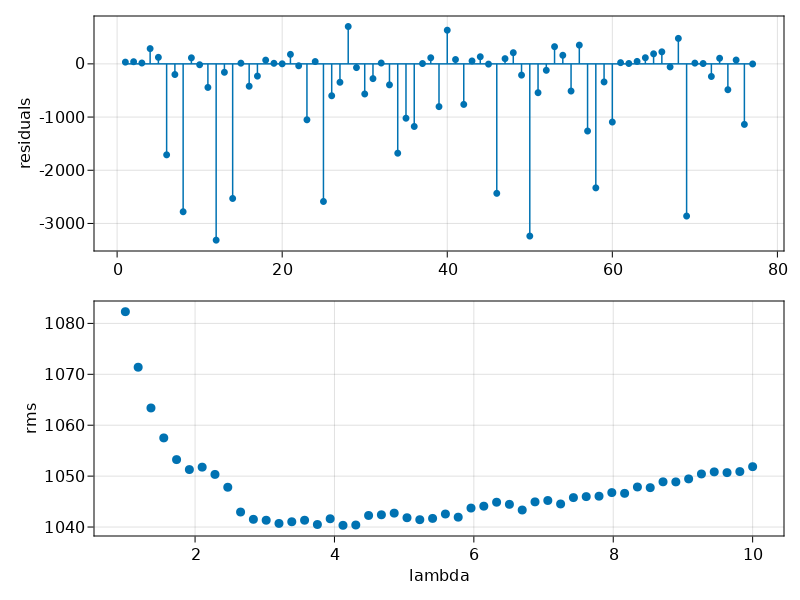

In [55]:
f = Figure()

ax1 = Axis(f[1, 1])
ax1.ylabel = "residuals"
stem!(ax1, ŷ - y)

ax2 = Axis(f[2, 1])
ax2.xlabel = "lambda"
ax2.ylabel = "rms"
scatter!(ax2, Float64.(m.report.plotting.parameter_values[:, 1]), m.report.plotting.measurements)

f